In [126]:
import dicom
import numpy as np

In [3]:
import pylab  

In [57]:
ds=dicom.read_file("result5/10015.dcm")  

In [58]:
print(ds.dir("pat"))

['ImageOrientationPatient', 'ImagePositionPatient', 'PatientAge', 'PatientBirthDate', 'PatientID', 'PatientName', 'PatientPosition', 'PatientSex', 'PatientWeight']


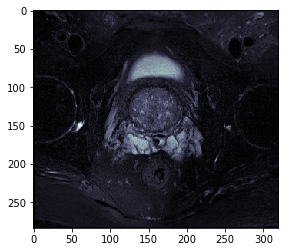

In [59]:
pylab.imshow(ds.pixel_array, cmap=pylab.cm.bone)  
pylab.show() 

In [60]:
import os

In [61]:
file_list = os.listdir("result5/")

In [62]:
fig_file = []
for i in range(len(file_list)):
    if file_list[i][-1]=='m':
        fig_file.append(file_list[i])

In [63]:
fig_file#去掉目录中的非dcm文件

['16228.dcm',
 '16256.dcm',
 '5380.dcm',
 '8382.dcm',
 '3205.dcm',
 '2044.dcm',
 '3017.dcm',
 '13795.dcm',
 '15590.dcm',
 '3213.dcm',
 '9660.dcm',
 '7057.dcm',
 '7352.dcm',
 '19485.dcm',
 '14938.dcm',
 '10341.dcm',
 '7347.dcm',
 '6061.dcm',
 '19468.dcm',
 '17758.dcm',
 '19424.dcm',
 '15591.dcm',
 '17663.dcm',
 '16787.dcm',
 '5500.dcm',
 '11209.dcm',
 '16896.dcm',
 '105.dcm',
 '12968.dcm',
 '13085.dcm',
 '6446.dcm',
 '17782.dcm',
 '10342.dcm',
 '17738.dcm',
 '11484.dcm',
 '17659.dcm',
 '17667.dcm',
 '10991.dcm',
 '5502.dcm',
 '17709.dcm',
 '18848.dcm',
 '19810.dcm',
 '3023.dcm',
 '19021.dcm',
 '1248.dcm',
 '19451.dcm',
 '6431.dcm',
 '364.dcm',
 '17779.dcm',
 '18883.dcm',
 '4183.dcm',
 '13420.dcm',
 '17710.dcm',
 '19416.dcm',
 '3682.dcm',
 '10340.dcm',
 '3344.dcm',
 '20537.dcm',
 '17409.dcm',
 '1498.dcm',
 '1393.dcm',
 '6298.dcm',
 '946.dcm',
 '2210.dcm',
 '19835.dcm',
 '19803.dcm',
 '17736.dcm',
 '10018.dcm',
 '6445.dcm',
 '13848.dcm',
 '14399.dcm',
 '16213.dcm',
 '9160.dcm',
 '20535.dc

In [68]:
max_h = 0
max_l = 0
for i in range(len(fig_file)):
    try:
        ds = dicom.read_file("result5/"+str(fig_file[i]))
        if ds.pixel_array.shape[0]>max_l:
            max_l = ds.pixel_array.shape[0]
        if ds.pixel_array.shape[1]>max_h:
            max_h = ds.pixel_array.shape[1]
    except:
        print("sth. wrong in i =",i)

sth. wrong in i = 754


In [181]:
#上面一段代码测试了最大图片范围是多大，得到结果是320*320就够用

In [101]:
lenth = len(fig_file)
dataset = np.zeros((lenth,320,320))
dataset_list = []
for i in range(lenth):
    try:
        ds = dicom.read_file("result5/"+str(fig_file[i]))
        data = ds.pixel_array
        h = (320 - data.shape[0]) // 2
        w = (320 - data.shape[1]) // 2
        dataset[i, h:-h, w:320-w] = data
        dataset_list.append(dataset[i])
    except:
        print("sth. wrong in i =",i)


sth. wrong in i = 754


In [103]:
np.shape(dataset_list)

(1027, 320, 320)

In [104]:
dataset_list = np.asarray(dataset_list)

In [121]:
np.savetxt("dataset_list",dataset_list.reshape(len(dataset_list),-1))

In [106]:
np.max(dataset_list)

2914.0

In [107]:
np.mean(dataset_list)

216.35994100687682

In [108]:
import matplotlib.pyplot as plt

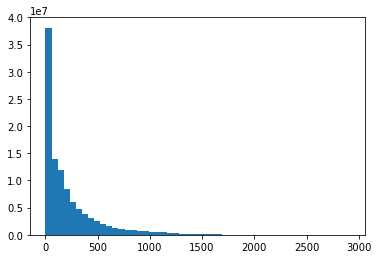

In [125]:
plt.hist(dataset_list.reshape(-1,),50)
plt.show()

In [130]:
dataset_list[dataset_list>1500]=1500

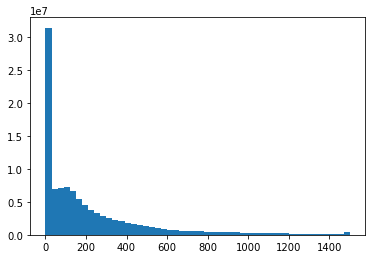

In [131]:
plt.hist(dataset_list.reshape(-1,),50)
plt.show()

In [132]:
nmlzd_data = dataset_list/1500.0#mormalized to [0,1]

In [133]:
from time import time
import pandas as pd
import numpy as np
from PIL import Image
import keras.layers.advanced_activations
import scipy
import random
import matplotlib.pyplot as plt  
from scipy.stats import norm  
import keras
from keras.models import Sequential
from keras.initializers import VarianceScaling,RandomNormal
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D
from keras.layers import UpSampling2D, Reshape, Lambda, Flatten, Activation
from keras.models import Model  
from keras.optimizers import SGD, Adadelta, Adagrad,Adam
from keras import backend as K  
from keras import objectives  
from keras.utils.vis_utils import plot_model  
from keras.utils import np_utils, generic_utils
import sys 
import tensorflow as tf
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import sklearn
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
%matplotlib inline
from sklearn import manifold, datasets,cluster
from sklearn.utils import check_random_state

Using TensorFlow backend.


In [151]:
batch_size =1
latent_dim = 10
nb_epoch = 50  
epsilon_std = 1.0  
intermediate_dim =256
original_dim = 320*320

USE = 'autoencoder'
#USE = 'vae'
#encoder:

input_img = Input(shape=(320,320,1))

conv_1 = Conv2D(10, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(input_img)
maxpool_1 = MaxPooling2D((2, 2),  padding='same')(conv_1)

conv_2 = Conv2D(10, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(maxpool_1)
maxpool_2 = MaxPooling2D((2, 2),  padding='same')(conv_2)

conv_3 = Conv2D(10, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(maxpool_2)
maxpool_3 = MaxPooling2D((2, 2),  padding='same')(conv_3)

conv_4 = Conv2D(10, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(maxpool_3)
maxpool_4 = MaxPooling2D((2, 2),  padding='same')(conv_4)

conv_5 = Conv2D(10, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(maxpool_4)
maxpool_5 = MaxPooling2D((2, 2),  padding='same')(conv_5)


#x = Conv2D(5, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
#x = MaxPooling2D((2, 2),  padding='same')(x)

visual = Flatten()(maxpool_5)
h_1 = Dense(intermediate_dim, activation='tanh')(visual)
encoded = Dense(latent_dim, activation='relu')(h_1)

z_mean = Dense(latent_dim)(h_1)
z_log_var = Dense(latent_dim)(h_1)

def sampling(args):   
    z_mean, z_log_var = args  
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0.,stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2)* epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

if USE == 'vae':
    h_3 = Dense(intermediate_dim,activation='tanh')(z)#for VAE

if USE == 'autoencoder':
    h_3 = Dense(intermediate_dim,activation='tanh')(encoded)#for AE
    
    
h_4 = Dense(20*10*10,activation='relu')(h_3)
h_5 = Reshape((10,10,20))(h_4)


conv_6 = Conv2D(10, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(h_5)
upsample_6 = UpSampling2D((2, 2))(conv_6)

conv_7 = Conv2D(10, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(upsample_6)
upsample_7 = UpSampling2D((2, 2))(conv_7)

conv_8 = Conv2D(10, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(upsample_7)
upsample_8 = UpSampling2D((2, 2))(conv_8)

conv_9 = Conv2D(10, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(upsample_8)
upsample_9 = UpSampling2D((2, 2))(conv_9)

conv_10 = Conv2D(10,  (3, 3), activation='tanh',padding='same',kernel_initializer='normal')(upsample_9)
upsample_10 = UpSampling2D((2, 2))(conv_10)

decoded = Conv2D(1, (3, 3), activation='tanh', padding='same')(upsample_10)


EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')


def vae_loss(x, decoded):  
    xent_loss = K.sum(K.sum(objectives.binary_crossentropy(x ,decoded),axis=-1),axis=-1)
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1) 
    return xent_loss + 1*kl_loss  

def ae_loss(x, decoded):  
    xent_loss = original_dim * objectives.mean_squared_error(x,decoded)
    return xent_loss

if USE == 'autoencoder':
    autoencoder = Model(inputs=input_img, outputs=decoded)
    autoencoder.compile(optimizer='rmsprop', loss=ae_loss)
if USE == 'vae':
    vae = Model(inputs=input_img, outputs=decoded) 
    vae.compile(optimizer='rmsprop', loss=vae_loss)

In [152]:
nmlzd_data = np.reshape(nmlzd_data,[-1,320,320,1])
autoencoder.fit(nmlzd_data, nmlzd_data,
        shuffle=True,
        epochs=5,
        batch_size=batch_size,
        validation_split = 0.2,callbacks=[EarlyStopping])

Train on 821 samples, validate on 206 samples
Epoch 1/5
821/821 [==============================] - 18s - loss: 1907.7049 - val_loss: 1587.3865
Epoch 2/5
821/821 [==============================] - 17s - loss: 1481.2092 - val_loss: 1491.6142
Epoch 3/5
821/821 [==============================] - 17s - loss: 1354.7642 - val_loss: 1430.1897
Epoch 4/5
821/821 [==============================] - 16s - loss: 1297.1031 - val_loss: 1561.1065
Epoch 5/5
821/821 [==============================] - 17s - loss: 1239.8997 - val_loss: 1356.4507


In [153]:
model_conv_1 = Model(input_img,conv_1)
model_pool_1 = Model(input_img,maxpool_1)
model_conv_2 = Model(input_img,conv_2)
model_pool_2 = Model(input_img,maxpool_2)
model_conv_3 = Model(input_img,conv_3)
model_pool_3 = Model(input_img,maxpool_3)
model_conv_4 = Model(input_img,conv_4)
model_pool_4 = Model(input_img,maxpool_4)
model_conv_5 = Model(input_img,conv_5)
model_pool_5 = Model(input_img,maxpool_5)
vis = Model(input_img, z_mean)
model_conv_6 = Model(input_img,conv_6)
model_up_6 = Model(input_img,upsample_6)
model_conv_7 = Model(input_img,conv_7)
model_up_7 = Model(input_img,upsample_7)
model_conv_8 = Model(input_img,conv_8)
model_up_8 = Model(input_img,upsample_8)
model_conv_9 = Model(input_img,conv_9)
model_up_9 = Model(input_img,upsample_9)
model_conv_10 = Model(input_img,conv_10)
model_up_10 = Model(input_img,upsample_10)

In [154]:
lyr = []
lyr.append(model_conv_1)
lyr.append(model_pool_1)
lyr.append(model_conv_2)
lyr.append(model_pool_2)
lyr.append(model_conv_3)
lyr.append(model_pool_3)
lyr.append(model_conv_4)
lyr.append(model_pool_4)
lyr.append(model_conv_5)
lyr.append(model_pool_5)
lyr.append(vis)
lyr.append(model_conv_6)
lyr.append(model_up_6)
lyr.append(model_conv_7)
lyr.append(model_up_7)
lyr.append(model_conv_8)
lyr.append(model_up_8)
lyr.append(model_conv_9)
lyr.append(model_up_9)
lyr.append(model_conv_10)
lyr.append(model_up_10)

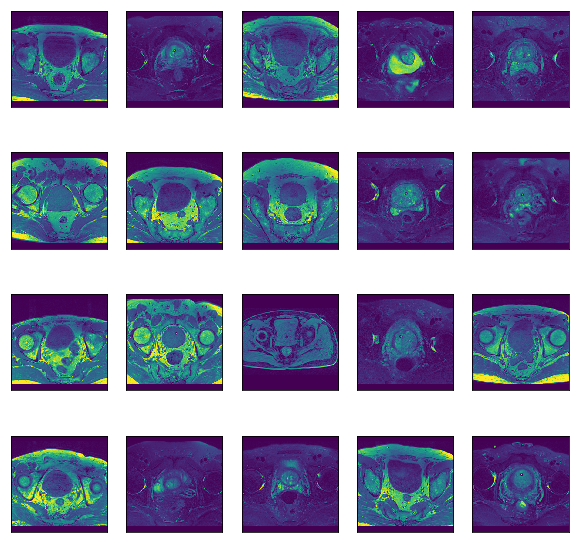

In [162]:
plt.figure(figsize=(10, 10))
for number in range(20):
    ax = plt.subplot(4,5,number+1)
    plt.imshow(nmlzd_data[1000+number][:,:,0])
    #plt.title("Class:%g" %(Class[1000+number]))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [161]:
nmlzd_data.shape

(1027, 320, 320, 1)

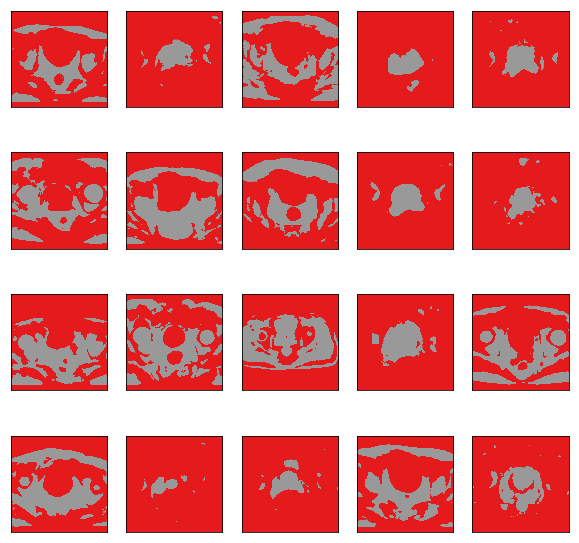

In [166]:
fig = plt.figure(figsize=(10, 10))
for number in range(20):
    No_ = number
    hypercolumns = []
    for i in [0,1,2,3,4,5,6,7,8,9]:
        for l in range(lyr[i].output_shape[3]):
            hypercolumns.append(scipy.misc.imresize(lyr[i].predict(nmlzd_data[1000:],batch_size=1)[No_,:,:,l],size=(320,320),mode="F", interp='bilinear'))
    
    hypercolumns = np.asarray(hypercolumns)
    m=hypercolumns.transpose(1,2,0).reshape(320*320,-1)
    kmeans = cluster.KMeans(n_clusters=2, max_iter=300, n_jobs=1, precompute_distances=True)
    cluster_labels = kmeans.fit_predict(m)
    if np.mean(cluster_labels)>0.5:
        cluster_labels = -cluster_labels
    imcluster = np.zeros((320,320))
    imcluster = imcluster.reshape((320*320,))
    imcluster = cluster_labels
    ax = plt.subplot(4,5,number+1)
    plt.imshow(imcluster.reshape(320, 320), cmap="Set1")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

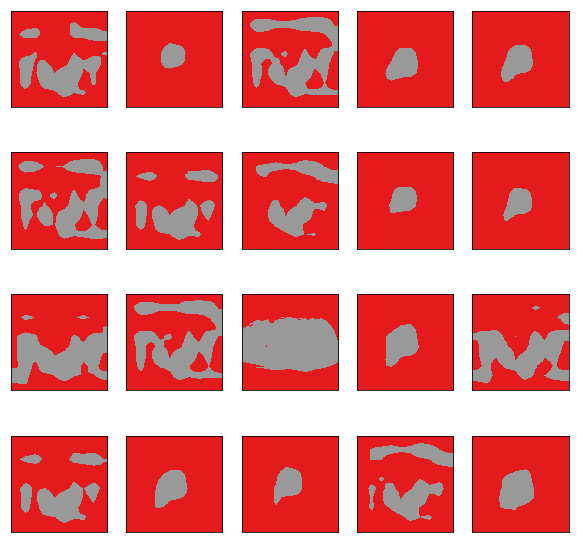

In [180]:
fig = plt.figure(figsize=(10, 10))
for number in range(20):
    No_ = number
    hypercolumns = []
    for i in [0,1,9,11,20,20]:
        for l in range(lyr[i].output_shape[3]):
            hypercolumns.append(scipy.misc.imresize(lyr[i].predict(nmlzd_data[1000:],batch_size=1)[No_,:,:,l],size=(320,320),mode="F", interp='bilinear'))
    
    hypercolumns = np.asarray(hypercolumns)
    m=hypercolumns.transpose(1,2,0).reshape(320*320,-1)
    kmeans = cluster.KMeans(n_clusters=2, max_iter=300, n_jobs=1, precompute_distances=True)
    cluster_labels = kmeans.fit_predict(m)
    if np.mean(cluster_labels)>0.5:
        cluster_labels = -cluster_labels
    imcluster = np.zeros((320,320))
    imcluster = imcluster.reshape((320*320,))
    imcluster = cluster_labels
    ax = plt.subplot(4,5,number+1)
    plt.imshow(imcluster.reshape(320, 320), cmap="Set1")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [182]:
#上面两段代码是用了不同的层做segmentation 得到的结果